# CAR PRICE PREDICTION

# 1. DATA UNDERSTANDING

In [ ]:
# Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("car data.csv") # Read the dataset

In [ ]:
df.head() # First 5 rows

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.tail() # Last 5 rows

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [ ]:
df.info() # Basic info about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
df.shape # Shape of the dataset

(301, 9)

In [ ]:
df.columns # Columns in the dataset

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [ ]:
df.describe() # Statistical info of the dataset

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# 2. DATA CLEANING

In [ ]:
df.isnull().sum() # Checking null values

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [ ]:
df.duplicated().sum() # Check duplicate values

2

In [ ]:
df.drop_duplicates(inplace=True) # Drop duplicate values
df.duplicated().sum()

0

# 3. EXPLORATORY DATA ANALYSIS

In [ ]:
# Unique values in each categorical column and their count
cat_col= ['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner']
def value_count():
    for column in cat_col:
        print('Name of the variable :', column)
        print(df[column].value_counts(), '\n\n')
value_count()

Name of the variable : Car_Name
Car_Name
city                        26
corolla altis               16
verna                       14
brio                        10
fortuner                    10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: count, Length: 98, dtype: int64 


Name of the variable : Year
Year
2015    60
2016    49
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2003     2
2007     2
2018     1
2004     1
Name: count, dtype: int64 


Name of the variable : Selling_Price
Selling_Price
0.45     8
0.60     8
5.25     7
4.50     7
0.20     6
        ..
3.80     1
3.45     1
5.90     1
35.00    1
11.50    1
Name: count, Length: 156, dtype: int64 


Name of the variable : Present_Price
Present_Price
9.40     14
13.60    13
5.70      8
1.47      7
0.51      6
         ..
36

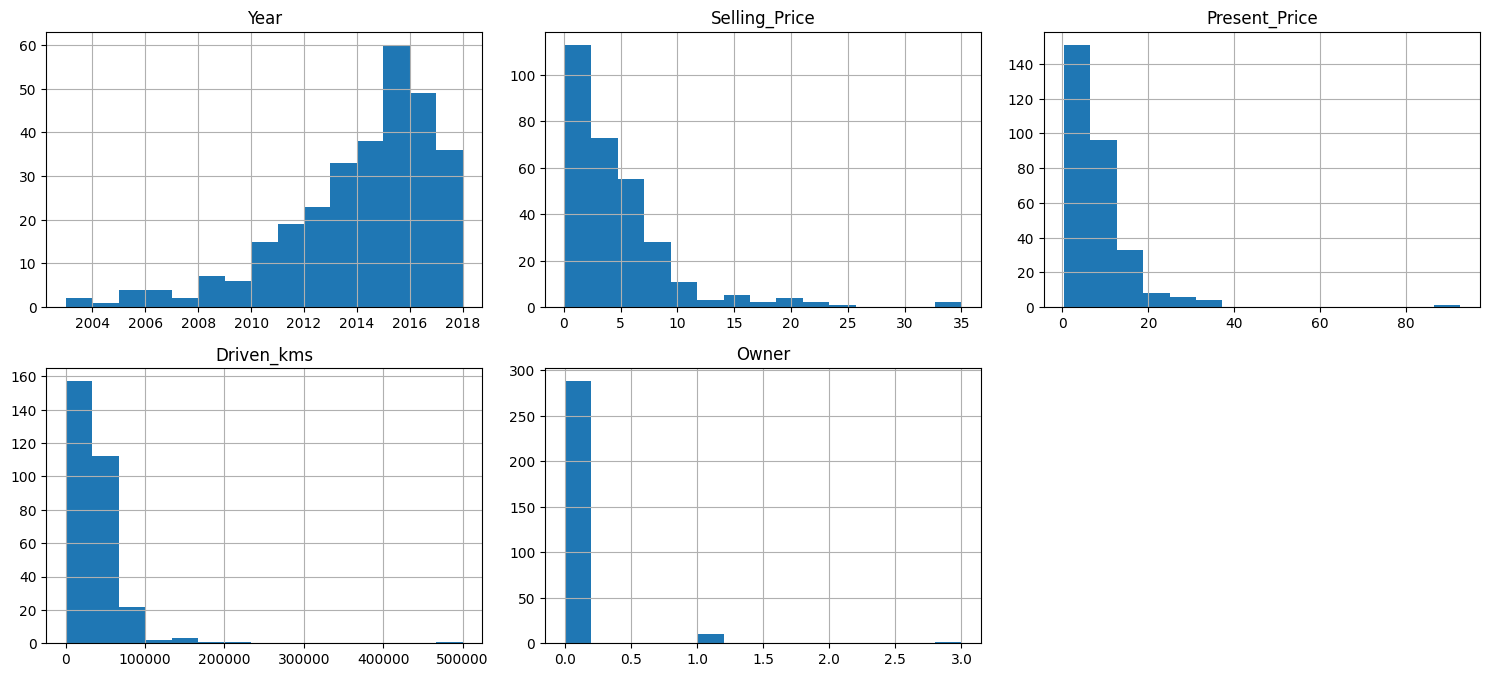

In [ ]:
# Univariate analysis of numerical columns
df.hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.tight_layout()
plt.show()

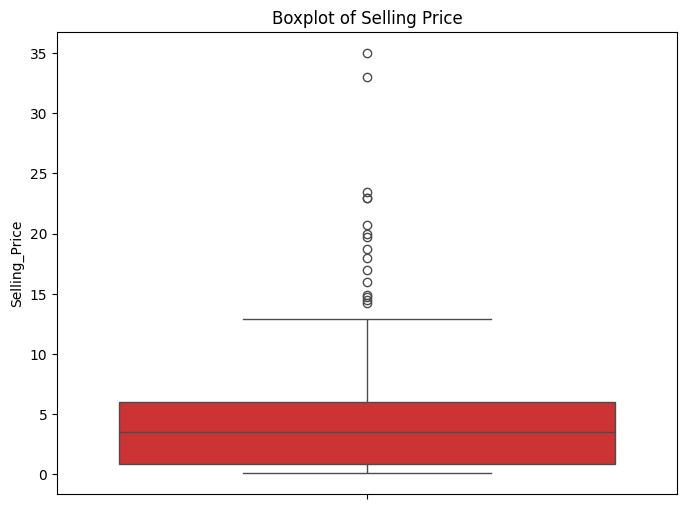

In [ ]:
# Box plot of Selling Price
plt.figure(figsize=(8, 6))
sns.boxplot(df['Selling_Price'],palette='Set1')
plt.title('Boxplot of Selling Price')
plt.show()

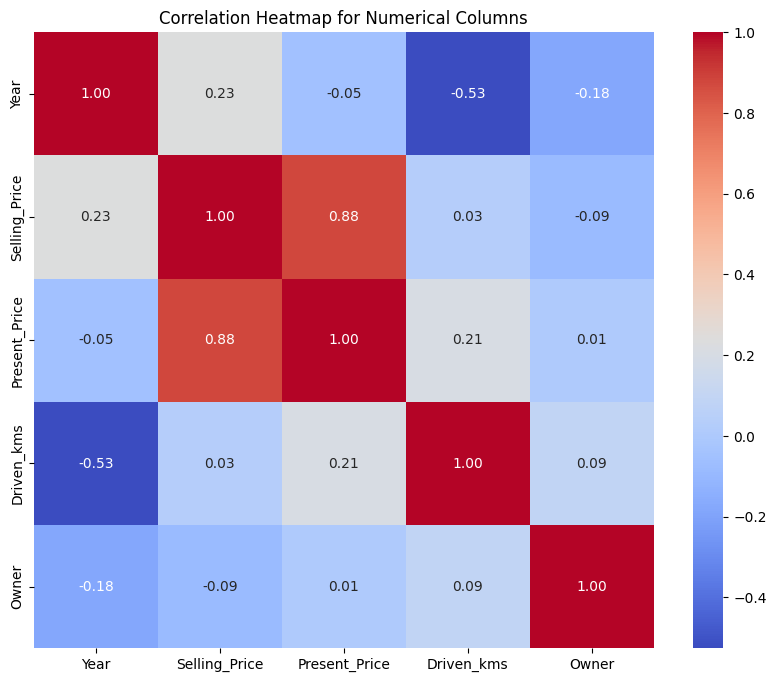

In [ ]:
# Calculate the correlation matrix for numerical columns using heatmap
numerical_columns = ['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner']
numerical_df = df[numerical_columns]
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Numerical Columns')
plt.show()

<Figure size 1000x600 with 0 Axes>

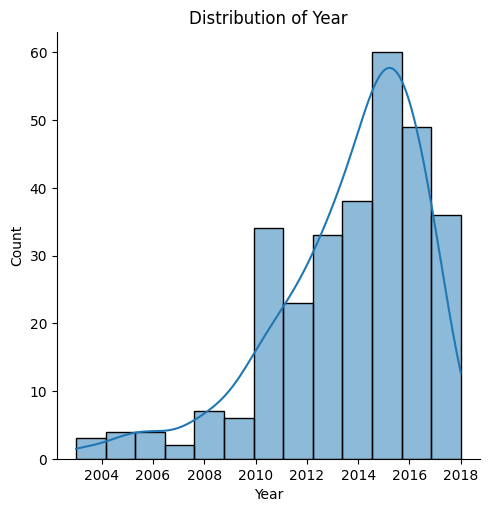

<Figure size 1000x600 with 0 Axes>

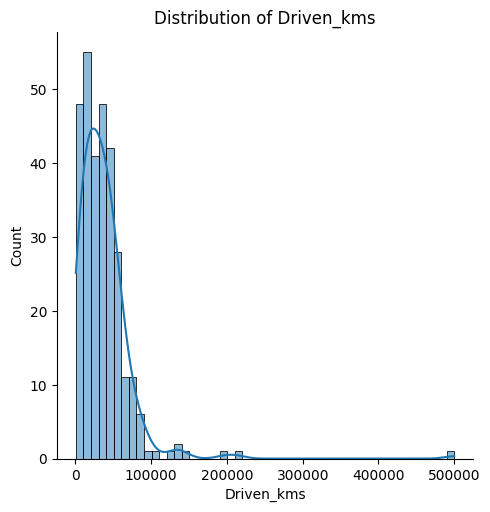

<Figure size 1000x600 with 0 Axes>

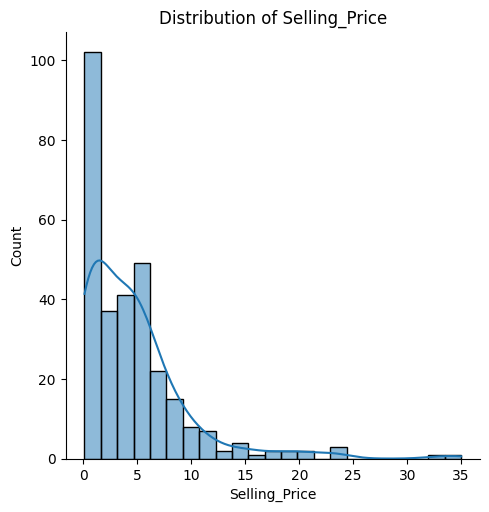

<Figure size 1000x600 with 0 Axes>

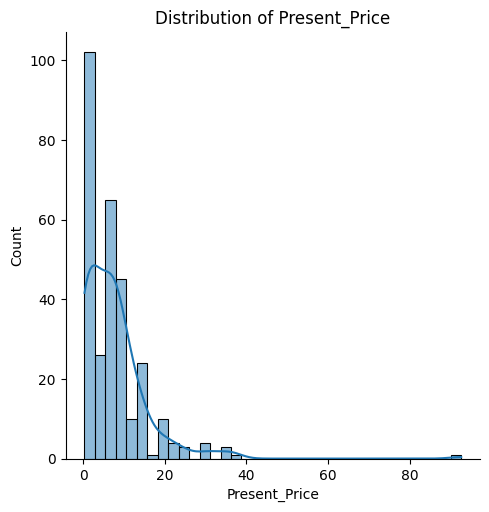

In [ ]:
numerical_features = ['Year', 'Driven_kms', 'Selling_Price', 'Present_Price']
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.displot(data=df, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

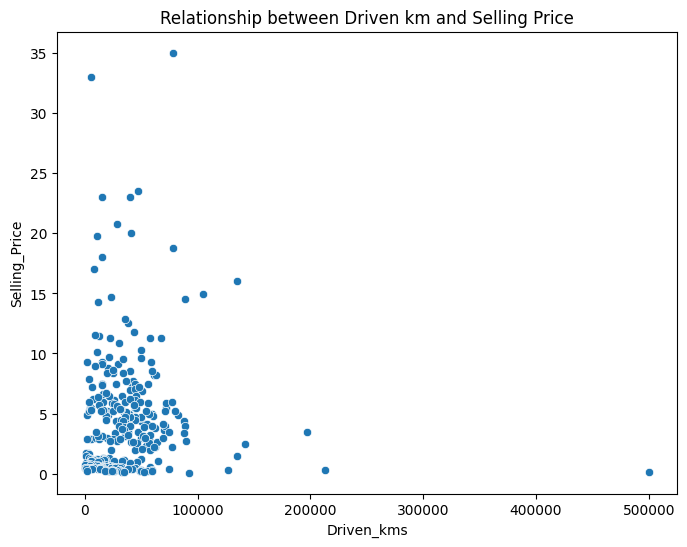

In [ ]:
# Scatter plot of Selling Price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Driven_kms', y='Selling_Price', data=df)
plt.title('Relationship between Driven km and Selling Price')
plt.show()

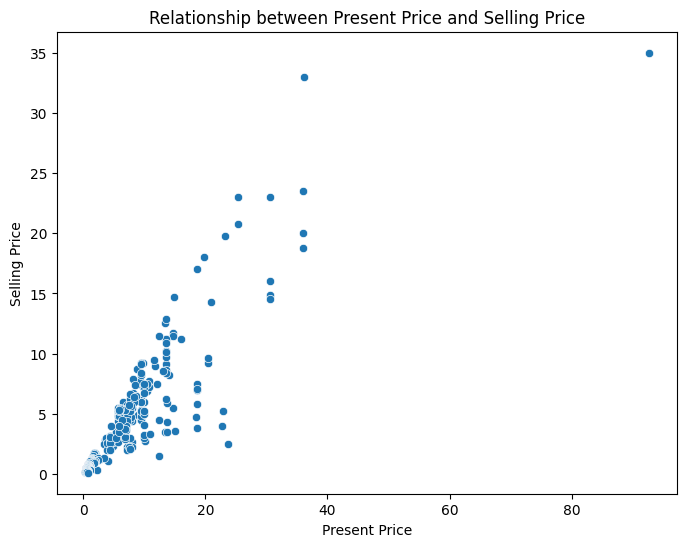

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Present_Price', y='Selling_Price', data=df)
plt.title('Relationship between Present Price and Selling Price')
plt.xlabel('Present Price')
plt.ylabel('Selling Price')
plt.show()

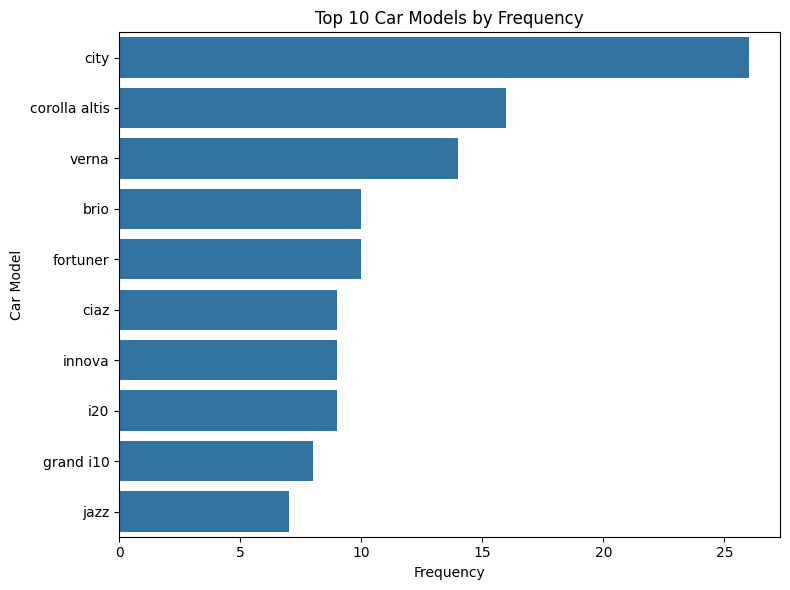

In [ ]:
# Top 10 car models to plot
n = 10
top_car_models = df['Car_Name'].value_counts().head(n)
plt.figure(figsize=(8, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {n} Car Models by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

# 4. DATA PREPARATION & TRANSFORMATION

In [ ]:
print(df['Fuel_Type'].value_counts())

Fuel_Type
Petrol    239
Diesel     58
CNG         2
Name: count, dtype: int64


In [ ]:
# Encoding categorical column
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
df.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


In [ ]:
X = df.drop(['Car_Name','Selling_Price'],axis=1)
y = df['Selling_Price']

In [ ]:
X

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [ ]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 299, dtype: float64

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
6,2015,8.12,18796,0,0,0,0
185,2008,0.58,1900,0,1,1,0
187,2013,0.51,32000,0,1,0,0
148,2010,0.94,45000,0,1,0,0
31,2011,4.89,54200,0,0,0,0
...,...,...,...,...,...,...,...
190,2008,0.75,60000,0,1,0,0
72,2013,18.61,56001,0,0,0,0
108,2016,1.50,18000,0,1,0,0
272,2015,10.00,27600,0,0,0,0


In [ ]:
X_test

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
283,2016,11.800,9010,0,0,0,0
267,2016,9.400,19434,1,0,0,0
166,2016,0.550,1000,0,1,0,0
9,2015,8.920,42367,1,0,0,0
78,2010,22.830,80000,0,0,1,0
280,2015,5.900,14465,0,0,0,0
95,2012,18.610,72000,0,0,0,0
111,2016,1.500,8700,0,1,0,0
5,2018,9.830,2071,1,0,0,0
175,2011,0.787,75000,0,1,0,0


In [ ]:
y_train

6      6.75
185    0.25
187    0.25
148    0.52
31     2.35
       ... 
190    0.20
72     7.45
108    1.20
272    7.50
104    1.35
Name: Selling_Price, Length: 239, dtype: float64

In [ ]:
y_test

283     8.99
267     8.35
166     0.45
9       7.45
78      5.25
280     5.25
95      5.85
111     1.15
5       9.25
175     0.38
99      9.65
197     0.16
186     0.25
156     0.48
58      4.10
61      4.50
149     0.51
110     1.20
64     33.00
142     0.60
157     0.48
106     1.35
249     5.25
47      1.05
43      5.50
277     9.70
282     8.25
118     1.10
215     4.50
238     4.80
18      3.25
241     4.75
34      5.50
25      3.00
46      2.65
7       6.50
115     1.11
196     0.17
113     1.15
94      4.00
76      5.50
83     12.50
120     1.05
77      1.50
131     0.75
199     0.12
212    11.25
290     4.50
221     4.50
180     0.30
146     0.55
188     0.25
85      2.50
250    12.90
279     6.25
74      4.90
246     3.75
26      4.15
211    11.75
60      6.95
Name: Selling_Price, dtype: float64

# 5. MODEL TRAINING & EVALUATION

In [ ]:
# Model Building
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Evaluate the model
y_pred = model_lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 6.675444100493416
R-squared: 0.7409934356413092


# 6. PREDICTIONS

In [ ]:
# Make a prediction
new_car = [[2022, 30000, 0, 1, 1, 0, 0]]  # Example new car data
predicted_price = model_lr.predict(new_car)
print('Predicted Selling Price:', predicted_price[0])

Predicted Selling Price: 13242.0375898621
